# Assignment 3

Gavin Kerr

B00801584

2023-02-08

In [27]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, math, time 
from scipy.special import factorial

# Question 1

Goal: create a function which takes two vectors and returns the equation

$$
\text{Output} = \sqrt{\sum{(v_i-w_i)^2}}
$$

In [28]:
def dist(v, w): # return the distance between two vectors
    v_diff = np.array(v) - np.array(w) # difference between two vectors
    v_squred = v_diff ** 2 # squared
    v_sum = np.sum(v_squred) # sum of squared vectors
    return np.sqrt(v_sum) # square root of sum of squared vectors

Discussion: I thought it was interesting that we had to support a variety of dimensions with this function rather and a fixed number of dimensions.

# Question 2

This function is supposed to support numbers in a list which begin with 0, but this is impossible in python. Perhaps the list should include numbers as strings rather than integers or floats.

In [29]:
def benfordize(a = np.array([123,234,543.4,'234',534,'057',678,4235])):
    # first we create a list of the fist number in each element of the input array
    # this is done by converting each element to a string then taking the first number in that string
    first_elements = [int(str(e)[0]) for e in a]
    # next we create a list of frequencies
    # this is done by taking the sum of a list of indices where elements in first_elements is equal to i
    # where i loops through 1 to 9
    frequencies = [len(np.where(np.array(first_elements) == i)[0]) for i in range(1,10)]
    # finally we convert from absolute to percent frequency
    pct_frequencies = [frequency/sum(frequencies)*100 for frequency in frequencies]
    return frequencies, pct_frequencies

Discussion: I've made very similar functions before so I didn't find this too challanging. 

# Question 3

I decided not to include zeros.

Create a function which generates a list of N random numbers between $10^{-10}$ and $10^{10}$.

In [30]:
rand_gen = lambda N: [10**random.uniform(-10,10) for i in range(N)]

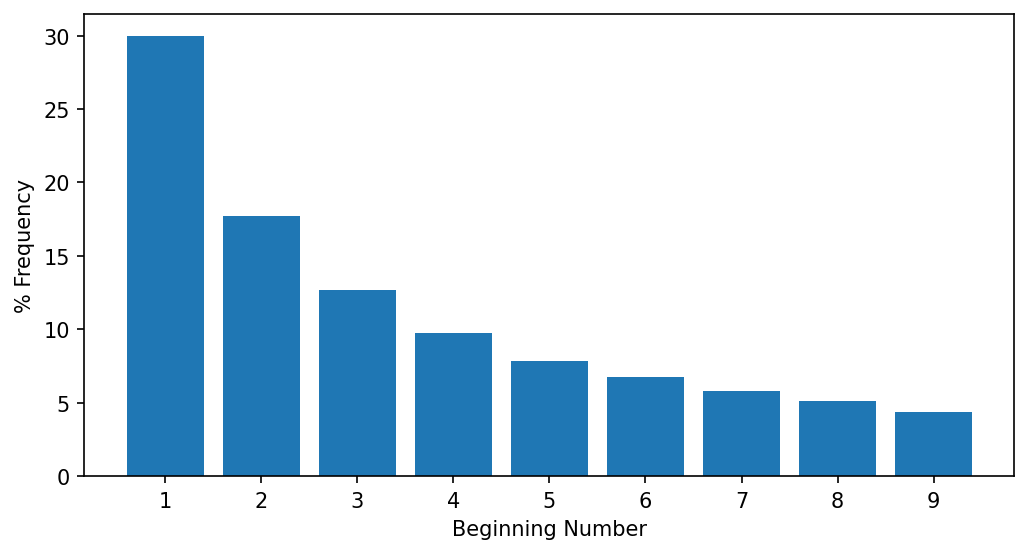

In [31]:
y_abs, y_pct = benfordize(rand_gen(N = 100_000))
x = [str(i) for i in range(1,10)]
fig, axes = plt.subplots(1,1, figsize=(8,4), dpi=150)
axes.bar(x,y_pct)
axes.set_xlabel("Beginning Number")
axes.set_ylabel(r"% Frequency")
plt.show()

Discussion: According to Benford's law, 1 should appear about 30 % of the time and 9 should appear less than 9% of the time. Our data agrees with Benford's Law. It's interesting that people use this to catch people who forge data. Also, I wonder if Benford's law is related to Zipf's law. 

# Question 4

Create a function which takes x and N and returns $\frac{x^N}{N!}$

In [32]:
my_exp = lambda x, N: sum([x**n/factorial(n) for n in range(N)])

We then plot my_exp along side np.exp to compare it with our approximation.

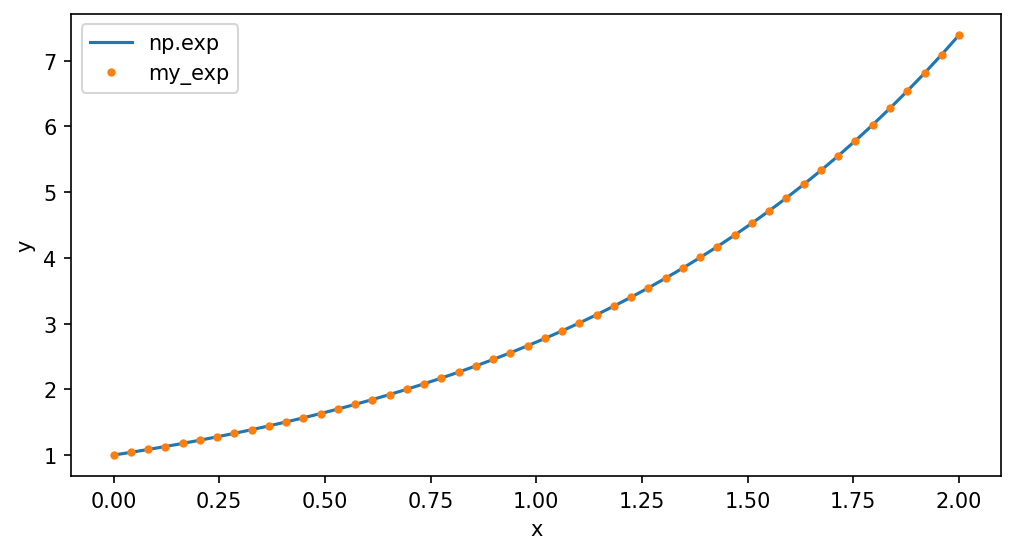

In [33]:
x, N = np.linspace(0,2,50), 100, # defines x and N to pass to out exponential approcimation function
fig, axes = plt.subplots(1,1, figsize=(8,4), dpi=150) # initializes figure
axes.plot(x, np.exp(x), '-', label="np.exp") # plots numpy's exponential
axes.plot(x, my_exp(x, N), '.', label="my_exp") # plots my exponential
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()
plt.show()

Discussion: I've made and plotted functions before so this question wasn't too challanging. 

# Question 5

Comparing my_exp(x,N)	and	np.exp(x),	plot	the	absolute	error	of	your	function	
vs	x	for	N	=	1,	10,	100.	Also	plot	the	absolute	relative	errors.	[Where	|f	1	−	f	2|	is	absolute	
error,	and	|f	1/f	2	−	1|	is	absolute	relative	error	between	two	functions.]	Pick	your	limits	
and	ranges	and	linear/log	scales	to	illustrate	where	my_exp()	works	well	(and	where	it	
doesn’t)

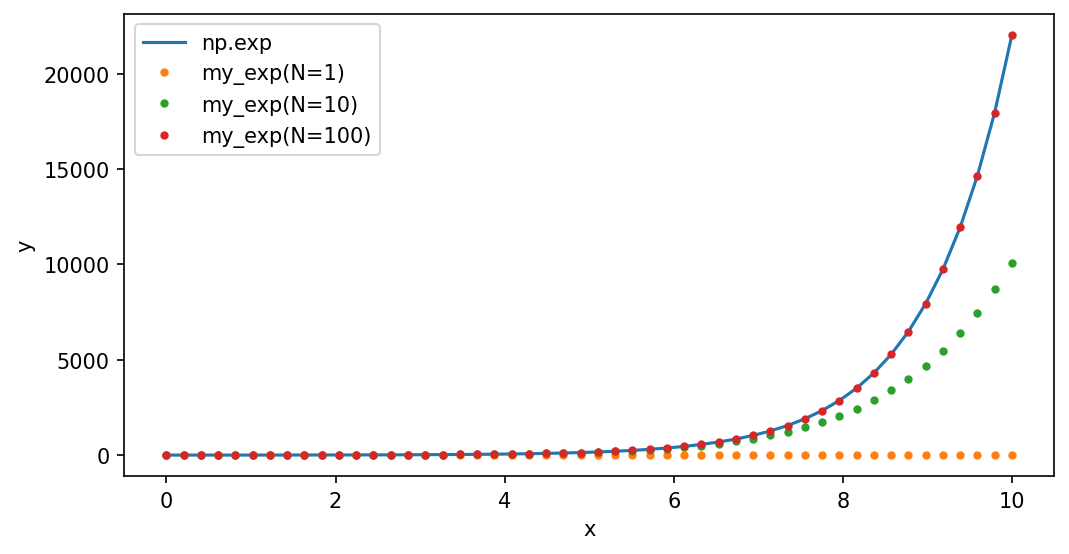

In [34]:
N_list = [1, 10, 100] # create a list of values for N
x = np.linspace(0, 10, 50) # create a list of values of x for plotting
fig, axes = plt.subplots(1,1, figsize=(8,4), dpi=150) # initialize figure 
axes.plot(x, np.exp(x), '-', label="np.exp") # plot the exponential according to numpy 
for N in N_list: # loop throug all values for N
    axes.plot(x, my_exp(x, N), '.', label="my_exp(N={})".format(N)) # plot my_exp against x for each value for N 
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()
plt.show()

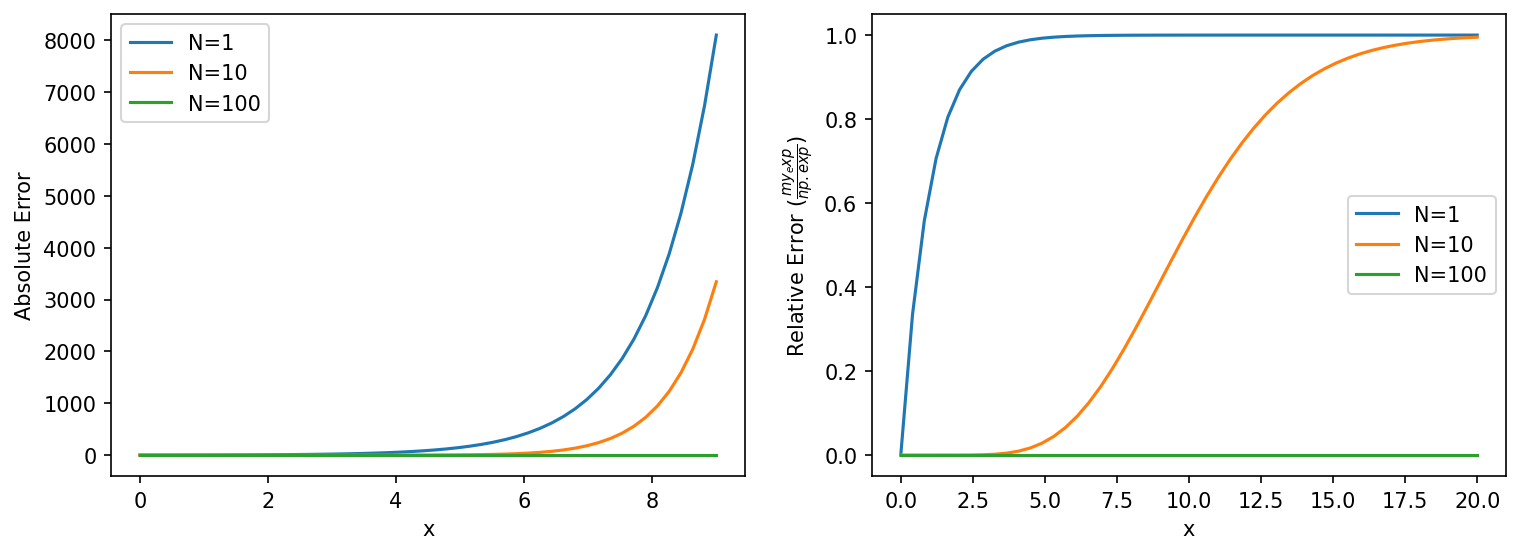

In [48]:
N_list = [1, 10, 100] # create a list of values for N
x_range_abs = np.linspace(0, 9, 50) # create two lists of x values for plotting
x_range_rel = np.linspace(0, 20, 50)
fig, axes = plt.subplots(1,2, figsize=(12,4), dpi=150) # initialize figure
for N in N_list: # loop through all of the values for N
    abs_error_lst = []
    for x in x_range_abs: # loop through and compute the error for each x value
        abs_error = abs(np.exp(x) - my_exp(x, N)) # compute the absolute error
        abs_error_lst.append(abs_error) # append the absolute error to list
    axes[0].plot(x_range_abs, abs_error_lst, label="N={}".format(N)) # plot error as a function of x for each N
    relative_error_lst = []
    for x in x_range_rel: # loop through and compute the error for each x value
        relative_error = abs(my_exp(x, N) - np.exp(x)) / np.exp(x)  # compute the relative error
        relative_error_lst.append(relative_error) # append the relative error to list
    axes[1].plot(x_range_rel, relative_error_lst, label="N={}".format(N)) # plot error as a function of x for each N
axes[0].set_xlabel("x")
axes[0].set_ylabel("Absolute Error")
axes[0].legend()
axes[1].set_xlabel("x")
axes[1].set_ylabel(r"Relative Error ($\frac{my_exp}{np.exp}$)")
axes[1].legend()
plt.show()

Discussion: It's interesting that the relative error plots seem to resemble a weibull cumulative distribution function.